## Extra notes

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Hyper parameters for model:
(hidden_layer_sizes: Any = (100, ), activation: str = "relu", *, solver: str = "adam", alpha: float = 0.0001, batch_size: str = "auto", learning_rate: str = "constant", learning_rate_init: float = 0.001, power_t: float = 0.5, max_iter: int = 200, shuffle: bool = True, random_state: Any | None = None, tol: float = 0.0001, verbose: bool = False, warm_start: bool = False, momentum: float = 0.9, nesterovs_momentum: bool = True, early_stopping: bool = False, validation_fraction: float = 0.1, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-8, n_iter_no_change: int = 10, max_fun: int = 15000) -> None

Relevant for project are: alpha, batch_size, learning_rate_init, momentum
max_iter for epoch plot (if using adam solver)
Alpha is for L2 regularization
Might want to change learning_rate from constant

activation functions we use: relu, tanh, logistic (sigmoid)

## Loading libraries

In [1]:
%matplotlib inline
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
from GridSearch import *
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

## Ignoring convergence warning for not bloating the output

In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Loading covid dataset and splitting in train / test

In [3]:

# Loading covid dataset
headers, X, Y = load_covid_data()

# Total amount of datapoints is 1 048 576
n_datapoints = 1048576

X = X[: n_datapoints, :] 
Y = Y[: n_datapoints] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Training model

In [4]:

layers = [12,10,8]
classifier = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu")
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=[12, 10, 8], random_state=1)

Testing model with a prediction

In [5]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred, Y_test))

[[192026   8583]
 [  2179   6927]]
0.9486827360942232


## Grid searching on hyperparameters for the MLP on different activation functions

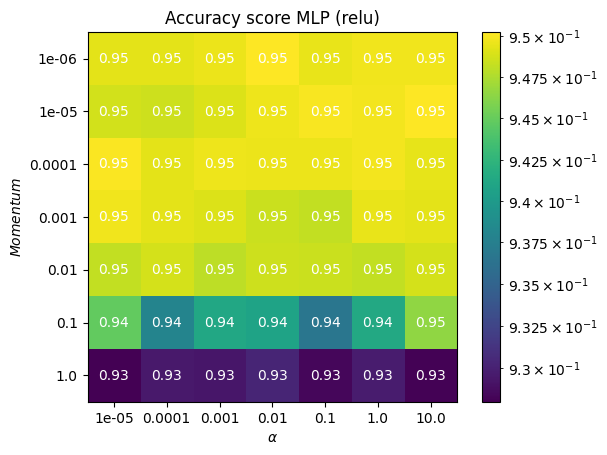

In [6]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose = False)

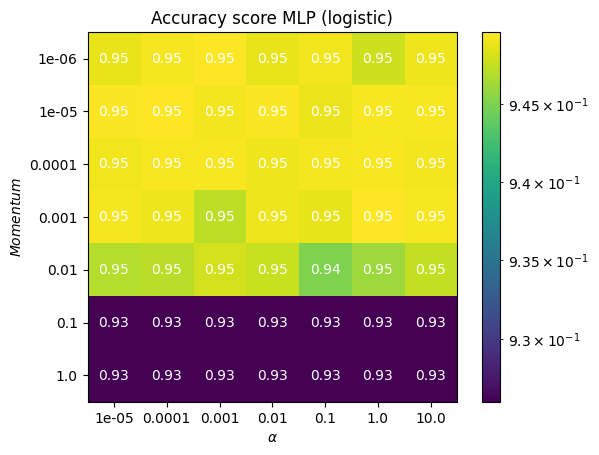

In [7]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (logistic)", func="logistic", verbose = False)

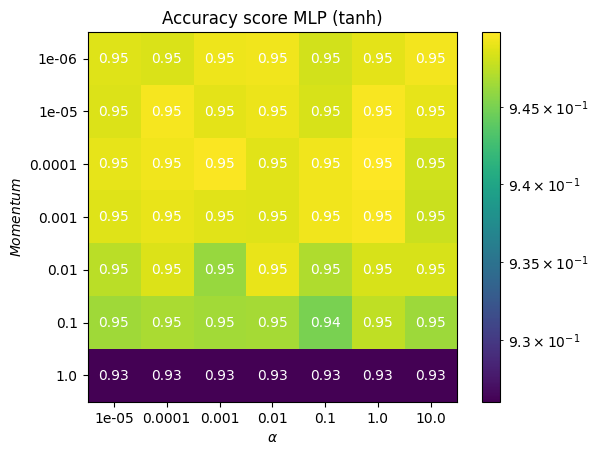

In [8]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (tanh)", func="tanh", verbose = False)

## Running the MLP classifiers with the best alpha and momentum for each activation function

In [9]:
model = MLPClassifier(activation = "relu", max_iter = 10000, alpha = 0.0001, momentum = 1e-05)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation = "logistic", max_iter = 10000, alpha = 0.0001, momentum = 1e-05)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation = "tanh", max_iter = 10000, alpha = 0.0001, momentum = 1e-05)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

[[191376   7890]
 [  2829   7620]]
0.948887776267792
[[190727   7005]
 [  3478   8505]]
0.9500131130343562
[[191242   7480]
 [  2963   8030]]
0.9502038480795365


We can see that tanh activation function is performing marginly better.

## Plotting accuracy score over epoch

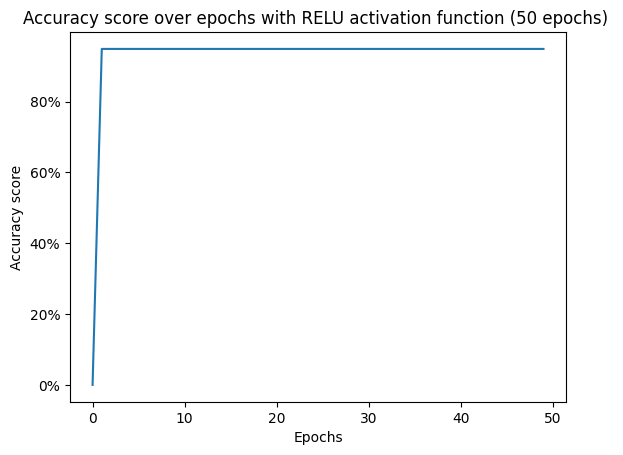

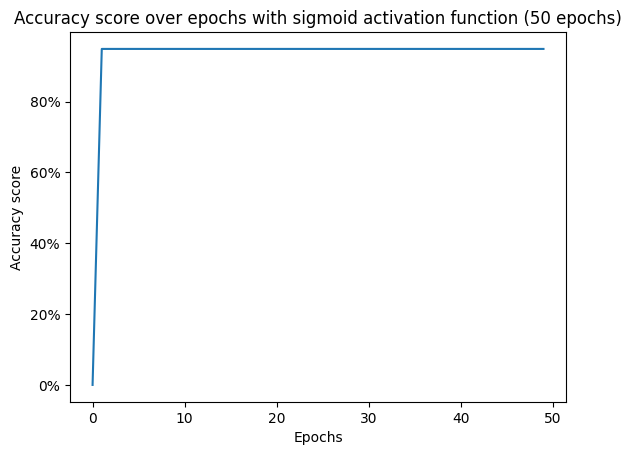

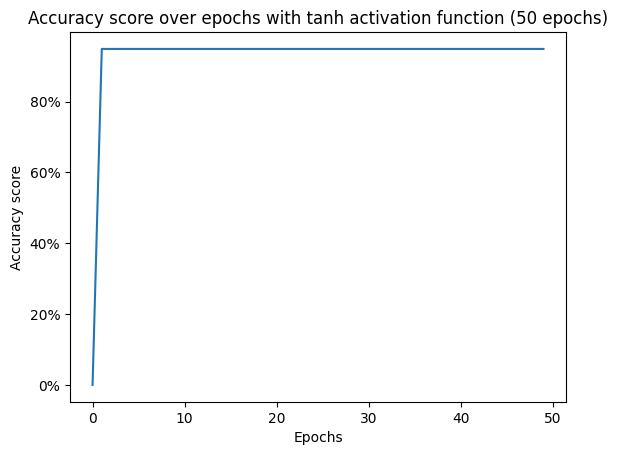

In [10]:
max_epochs = 50

predictions = np.zeros((max_epochs, 3))

for i in range(1, max_epochs):
    classifier_relu = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu", max_iter = i, alpha = 0.0001, momentum = 1e-05)
    classifier_relu.fit(X_train, Y_train)
    predictions[i, 0] = accuracy_score(classifier.predict(X_test), Y_test, conf = False)

    classifier_sigmoid = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="logistic", max_iter = i, alpha = 0.0001, momentum = 1e-05)
    classifier_sigmoid.fit(X_train, Y_train)
    predictions[i, 1] = accuracy_score(classifier.predict(X_test), Y_test, conf = False)

    classifier_tanh = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="tanh", max_iter = i, alpha = 0.0001, momentum = 1e-05)
    classifier_tanh.fit(X_train, Y_train)
    predictions[i, 2] = accuracy_score(classifier.predict(X_test), Y_test, conf = False)

# Plotting for relu
plt.figure()
plt.plot(predictions[:, 0] * 100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy score")
plt.title(f"Accuracy score over epochs with RELU activation function ({max_epochs} epochs) ")
plt.savefig("../figures/accuracy_over_epochs_mlp_relu")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Plotting for sigmoid
plt.figure()
plt.plot(predictions[:, 1] * 100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy score")
plt.title(f"Accuracy score over epochs with sigmoid activation function ({max_epochs} epochs)")
plt.savefig("../figures/accuracy_over_epochs_mlp_relu")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Plotting for tanh
plt.figure()
plt.plot(predictions[:, 2] * 100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy score")
plt.title(f"Accuracy score over epochs with tanh activation function ({max_epochs} epochs)")
plt.savefig("../figures/accuracy_over_epochs_mlp_relu")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

## Random forests method

In [11]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

## Making a prediction with the random forest method

In [12]:
Y_pred = forest.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print("predicted chance of dying:",np.sum(Y_pred)/len(Y_pred))
print("Actual chance of dying (test set):",np.sum(Y_test)/len(Y_test))

[[189736   4469]
 [  7177   8333]]
0.9444674915957371
predicted chance of dying: 0.06104475120997544
Actual chance of dying (test set): 0.07395751376868608


## Plotting the feature importances

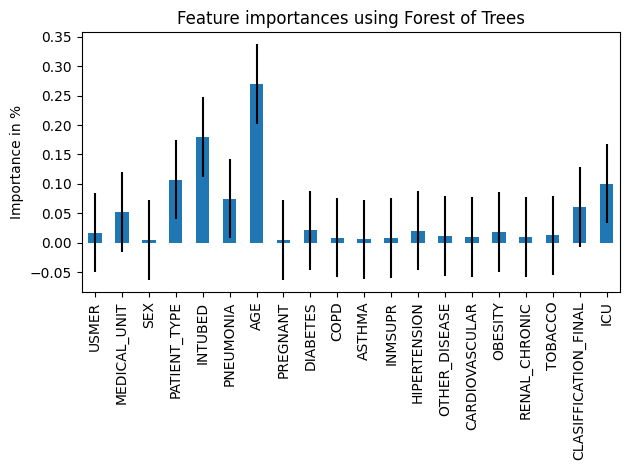

In [13]:

importances = forest.feature_importances_
std = np.std(importances)
forest_importances = pd.Series(importances, index=headers)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Forest of Trees")
ax.set_ylabel("Importance in %")
fig.tight_layout()


## Making histogram of amount of deaths given a certain age

Text(0.5, 0, 'Age')

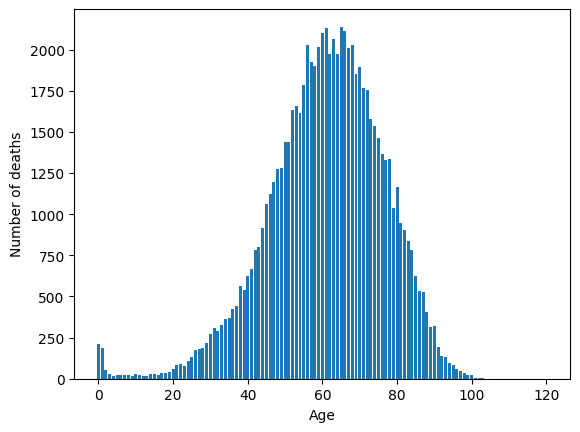

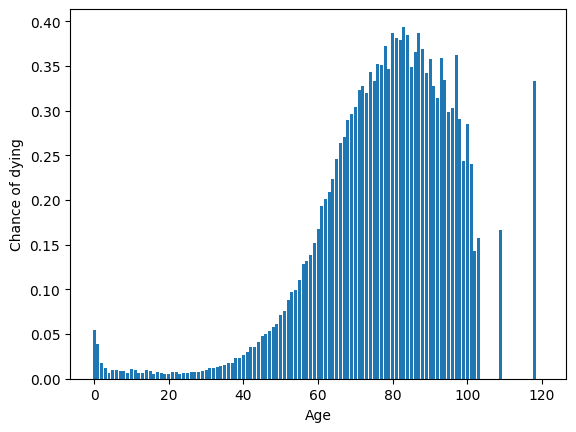

In [14]:
age = X[:,6]
deaths = {i:0 for i in np.unique(age)}
for i in range(len(Y)):
    deaths[age[i]] += Y[i]

plt.figure()
plt.bar(range(len(deaths)), list(deaths.values()))
plt.ylabel("Number of deaths")
plt.xlabel("Age")

#Making histogram of chance of dying given a certain age

chance_dying = deaths.copy()
amount = {i:0 for i in np.unique(age)}

for i in range(len(Y)):
    amount[age[i]] += 1

for key in chance_dying:
    chance_dying[key] /= amount[key]

plt.figure()
plt.bar(range(len(chance_dying)), list(chance_dying.values()))
plt.ylabel("Chance of dying")
plt.xlabel("Age")

## Looking into chance of dyaing based on age

In [15]:
#Note, not finished, need to figure out way to fix imbalanced data

Age_train = X_train[:,6].reshape(-1,1)
Age_test = X_test[:,6].reshape(-1,1)

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(Age_train, Y_train)
YA_pred = model.predict(Age_test)
print(accuracy_score(YA_pred, Y_test))

[[194200  15510]
 [     5      0]]
0.9260186443506664


In [16]:
forestAge = RandomForestClassifier(random_state=1)
forestAge.fit(Age_train, Y_train)
pred = forestAge.predict(Age_test)
accuracy_score(pred, Y_test)

[[194205  15510]
 [     0      0]]


0.9260424862313139

Seems we arent able to classify based on just age. This makes sence since every percentage based on age is lower than 50, so
our classifier would not benefit from setting any given age as death.
We therefore try with polynomial fitting.

In [17]:
def ChanceDying(X,Y):
    ages = np.unique(X)
    deaths = {i:0 for i in ages}
    numb = deaths.copy()
    for i in range(len(Y)):
        deaths[X[i]] += Y[i]
        numb[X[i]] += 1


    for key in deaths:
        if numb[key] > 0:
            deaths[key] /= numb[key] 
    
    return deaths 

def MakeArray(dict):
    length = len(dict)
    x_arr = np.zeros(length)
    y_arr = np.zeros(length)

    for i,key in enumerate(dict):
        x_arr[i] = key 
        y_arr[i] = dict[key]

    return x_arr, y_arr

In [18]:
Age = X[:,6]
M = len(Age) #chosen number of data points
n = len(Age)
m = int(n/M)
random_index = np.random.randint(m)*M   
new_Age = Age[random_index:random_index+M]
new_Y = Y[random_index:random_index+M]

Age_train, Age_test, YA_train, YA_test = train_test_split(new_Age, new_Y, test_size=0.2)

deaths_train = ChanceDying(Age_train, YA_train)
probx_train, proby_train = MakeArray(deaths_train)

deaths_test = ChanceDying(Age_test, YA_test)
probx_test, proby_test = MakeArray(deaths_test)

#Testing to find optimal polynomial degree
for i in range(20):
    lin = LinearRegression()
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(probx_train.reshape(-1,1))
    lin.fit(X_poly, proby_train)

    X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
    print(i, MSE(proby_test, lin.predict(X_poly_test)))

0 0.022983026189221236
1 0.016893445175022025
2 0.013038707982940375
3 0.005019153605966107
4 0.00511521833332144
5 0.003259496939919912
6 0.002359981339905586
7 0.002367518980849943
8 0.0023719293463383417
9 0.002387146431685037
10 0.0023999850275277343
11 0.0024310204770879
12 0.0024796645466819713
13 0.0025436876010715486
14 0.0026283393692452315
15 0.002753048280261733
16 0.0029442843766282712
17 0.003247504540972579
18 0.004927703037699808
19 0.0058361998195190015


Doing multiple runs it seems around 10 is the most stable amount of polynomials.

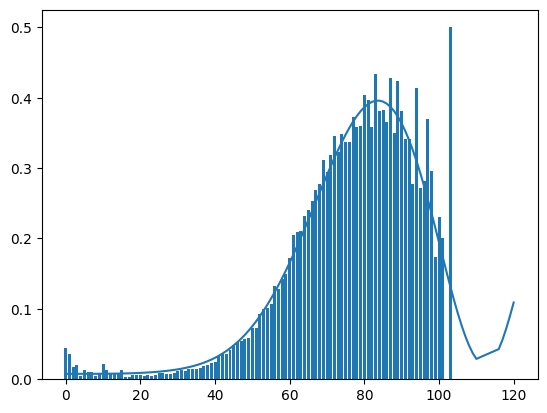

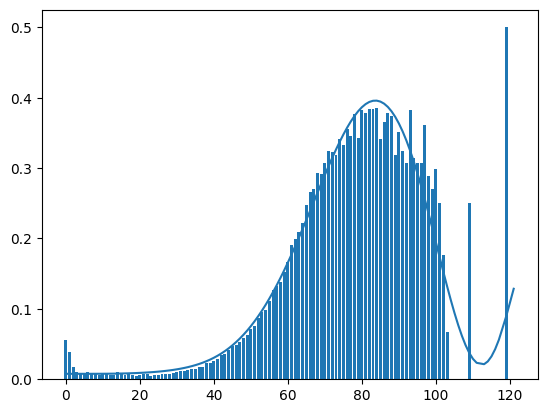

In [19]:
lin = LinearRegression()
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(probx_train.reshape(-1,1))
lin.fit(X_poly, proby_train)

X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))

plt.plot(probx_test, lin.predict(X_poly_test))
plt.bar(probx_test, proby_test)
plt.show()

plt.bar(probx_train, proby_train)
plt.plot(probx_train, lin.predict(X_poly))

0.0011012131084004824


<BarContainer object of 121 artists>

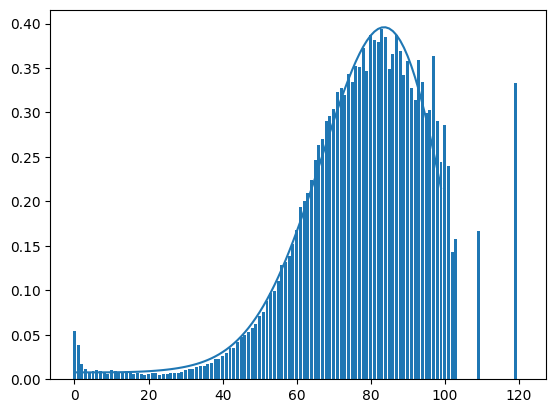

In [20]:
pred = lin.predict(X_poly_test)
length = len(pred)
X_true, ans = MakeArray(chance_dying)
print(MSE(ans[:length], pred))


length = 100
X_poly_true = poly.fit_transform(X_true.reshape(-1,1))
plt.plot(X_true[:length], lin.predict(X_poly_true[:length]))
plt.bar(X_true, ans)

Now testing for different sample sizes 

MSE for sample size 100 is: 0.025898074719647026
MSE for sample size 1000 is: 0.009655079271522248
MSE for sample size 10000 is: 2.6205869135982813
MSE for sample size 50000 is: 0.0003250998461767711
MSE for sample size 100000 is: 0.0013035501734167474
MSE for sample size 200000 is: 0.0003750979857343139
MSE for sample size 500000 is: 0.0006737654719965438


<BarContainer object of 121 artists>

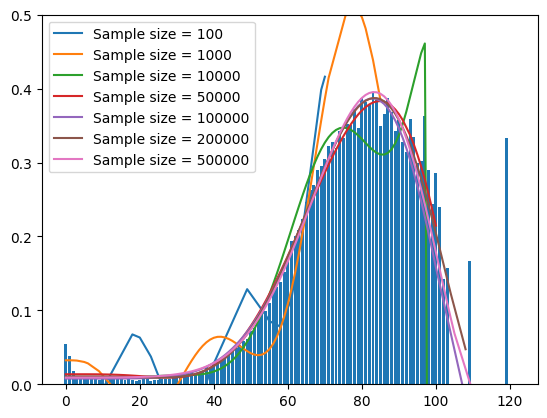

In [21]:

for M in [100,1000,10000, 50000, 100000, 200000, 500000]:
    Age = X[:,6]
    
    #Shuffling data because it seems not random enough for good resampling
    Age, new_Y = shuffle(Age,Y)

    #M = len(Age) #chosen number of data points
    n = len(Age)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_Age = Age[random_index:random_index+M]
    new_Y = new_Y[random_index:random_index+M]

    Age_train, Age_test, YA_train, YA_test = train_test_split(new_Age, new_Y, test_size=0.2)

    deaths_train = ChanceDying(Age_train, YA_train)
    probx_train, proby_train = MakeArray(deaths_train)

    deaths_test = ChanceDying(Age_test, YA_test)
    probx_test, proby_test = MakeArray(deaths_test)

    lin = LinearRegression()
    poly = PolynomialFeatures(degree=10)
    X_poly = poly.fit_transform(probx_train.reshape(-1,1))
    lin.fit(X_poly, proby_train)

    X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
    pred = lin.predict(X_poly_test)
    plt.plot(probx_test, pred, label=f"Sample size = {M}")

    print(f"MSE for sample size {M} is:",MSE(ans[:len(pred)], pred))

    #length = 100
    #X_poly_true = poly.fit_transform(X_true.reshape(-1,1))
    #plt.plot(X_true[:length], lin.predict(X_poly_true[:length]))
    

plt.legend()
plt.ylim(0,0.5)
plt.bar(X_true, ans)

In [22]:
#Test code, use later for removing features

A = [1,2,2,2,3,3,5,5]
A = np.array(A)
remove = np.where(A > 2)
A = np.delete(A, remove)
print(A)

[1 2 2 2]
